In [2]:
import numpy as np
import pandas as pd
import scipy
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as stm
from numpy.fft import fft, ifft, ifftshift, fftshift

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_86305/1637311677.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Arithmetic Brownian motion $dX(t) = \mu dt + \sigma dW(t)$')


Text(0.5, 1.0, 'Arithmetic Brownian motion $dX(t) = \\mu dt + \\sigma dW(t)$')

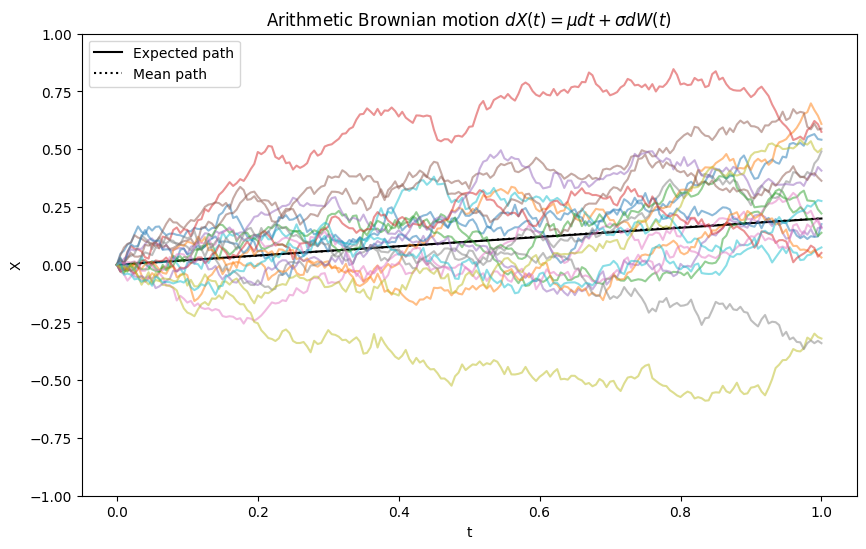

In [3]:
# Define parameters and time grid
npaths = 20000  # number of paths
T = 1  # time horizon
nsteps = 200  # number of time steps
dt = T / nsteps  # time step
t = np.linspace(0, T, nsteps + 1)  # observation times
mu = 0.2
sigma = 0.3

# Monte Carlo
# Compute the increments with Euler-Maruyama
dX = mu * dt + sigma * np.random.randn(npaths, nsteps) * np.sqrt(dt)
# Accumulate the increments
X = np.column_stack([np.zeros(npaths), np.cumsum(dX, axis=1)])

# Expected, mean, and sample path
plt.figure(figsize=(10, 6))
EX = mu * t
plt.plot(t, EX, 'k', label='Expected path')
plt.plot(t, np.mean(X, axis=0), ':k', label='Mean path')
plt.plot(t, X[::1000, :].T, alpha=0.5)
plt.legend()
plt.xlabel('t')
plt.ylabel('X')
plt.ylim([-1, 1])
plt.title('Arithmetic Brownian motion $dX(t) = \mu dt + \sigma dW(t)$')

Text(0.5, 1.0, 'Comparing the theoretical mean of the ABM with the one estimated via MC')

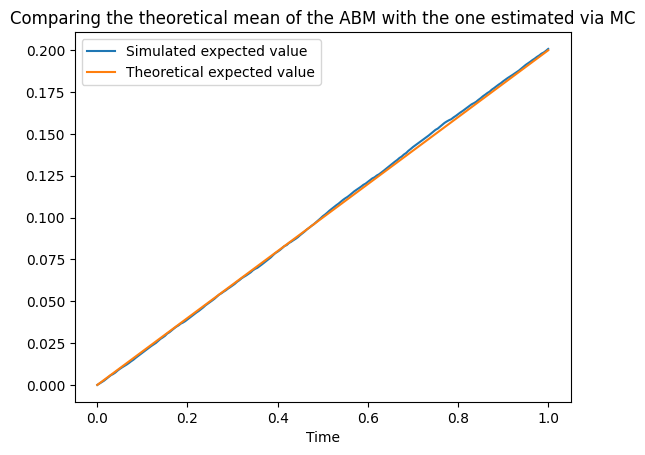

In [4]:
# Estimate mean of X(t) from the simulations and compare to the true one
SimulatedMean=np.mean(X, axis=0)
plt.figure()
plt.plot(t, SimulatedMean, label='Simulated expected value')
plt.plot(t, EX, label='Theoretical expected value')
plt.xlabel('Time')
plt.legend(loc=0)
plt.title('Comparing the theoretical mean of the ABM with the one estimated via MC') 

<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_86305/4088494479.py:7: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('$\ Var(X) = E[(X^2)-(E(X)^2)]$')


Text(0.5, 1.0, 'Arithmetic Brownian motion: Mean Square Deviation')

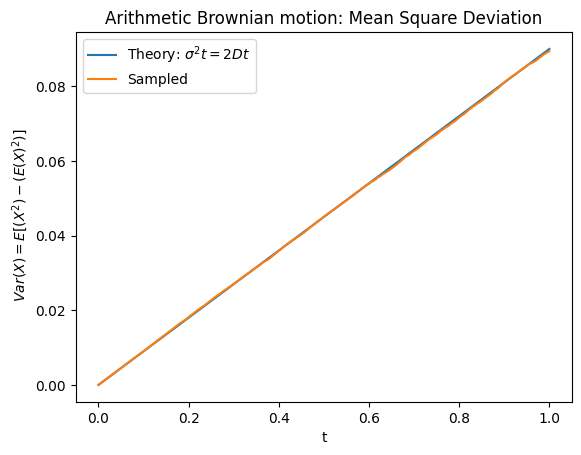

In [5]:
# Variance = mean square deviation = mean square displacement of random part
plt.figure()
plt.plot(t, sigma**2 * t, label='Theory: $\\sigma^2t = 2Dt$')
plt.plot(t, np.var(X, axis=0), label='Sampled')
plt.legend(loc='upper left')
plt.xlabel('t')
plt.ylabel('$\ Var(X) = E[(X^2)-(E(X)^2)]$')
plt.title('Arithmetic Brownian motion: Mean Square Deviation')

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\p'
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_86305/737787724.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(t, sigma * np.sqrt(2 * t / np.pi), label='Theory: $\sigma(2t/\pi)^{1/2}$')
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_86305/737787724.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('E(|X-E(X)|) = $(2Var(X)/\pi)^{1/2}$')


Text(0.5, 1.0, 'Arithmetic Brownian motion: Mean Absolute Deviation')

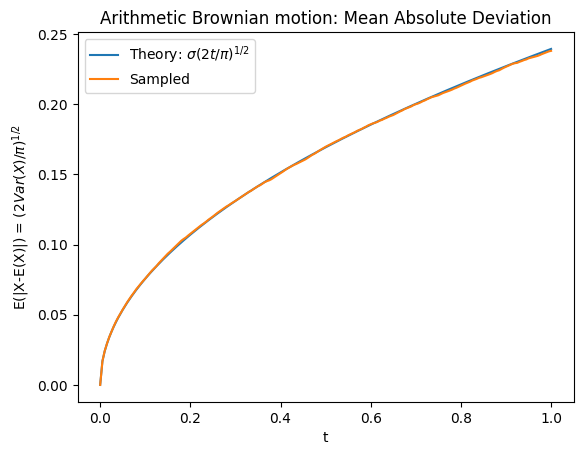

In [6]:
# Mean absolute deviation
plt.figure()
plt.plot(t, sigma * np.sqrt(2 * t / np.pi), label='Theory: $\sigma(2t/\pi)^{1/2}$')
plt.plot(t, np.mean(np.abs(X - EX), axis=0), label='Sampled')
plt.legend(loc='upper left')
plt.xlabel('t')
plt.ylabel('E(|X-E(X)|) = $(2Var(X)/\pi)^{1/2}$')
plt.title('Arithmetic Brownian motion: Mean Absolute Deviation')

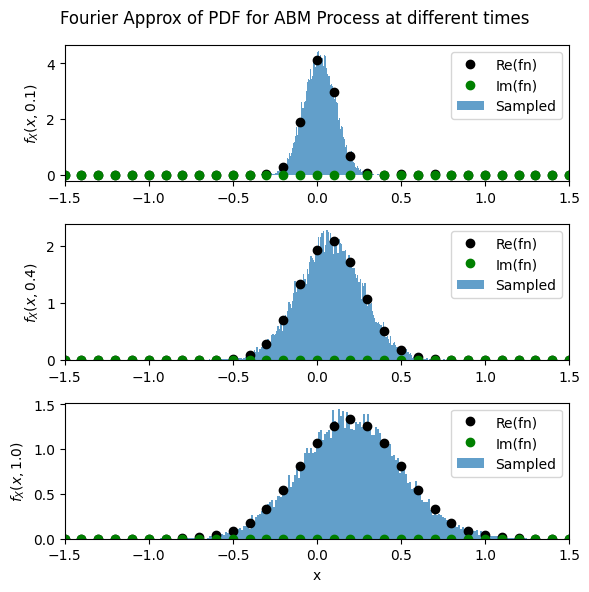

In [7]:
# FT Approx of Pdf using IFFT
N = 512
dx = 0.1
upperx = N * dx
x = dx * np.arange(-N/2, N/2)
dxi = 2 * np.pi / (N * dx)
xi = dxi * np.arange(-N/2, N/2)

fig, ax = plt.subplots(3,1, figsize=(6,6))
for i,time in enumerate([20, 80, -1]):

    # Pulsation space: xi
    char_func = np.exp(1j * xi * mu * t[time] - 0.5 * (xi * sigma)**2 * t[time])
    f_X = fftshift(fft(ifftshift(char_func))) / upperx

    # Figures
    ax[i].hist(X[:,time],density=True,bins=nsteps, alpha=0.7)
    ax[i].plot(x,np.real(f_X), 'ko', linewidth=2)
    ax[i].plot(x,np.imag(f_X), 'go')
    
    ax[i].set_ylabel(f'$f_X(x, {t[time]:.1f})$')
    ax[i].set_xlim(-1.5,1.5)
    ax[i].legend(['Re(fn)', 'Im(fn)','Sampled'])

plt.suptitle('Fourier Approx of PDF for ABM Process at different times')
plt.xlabel('x')
plt.tight_layout()

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_86305/1800611951.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Arithmetic Brownian motion: Solution of the Fokker-Planck equation\nwith $\mu = -0.05$, $\sigma = 0.4$')


Text(0.5, 0.92, 'Arithmetic Brownian motion: Solution of the Fokker-Planck equation\nwith $\\mu = -0.05$, $\\sigma = 0.4$')

<Figure size 640x480 with 0 Axes>

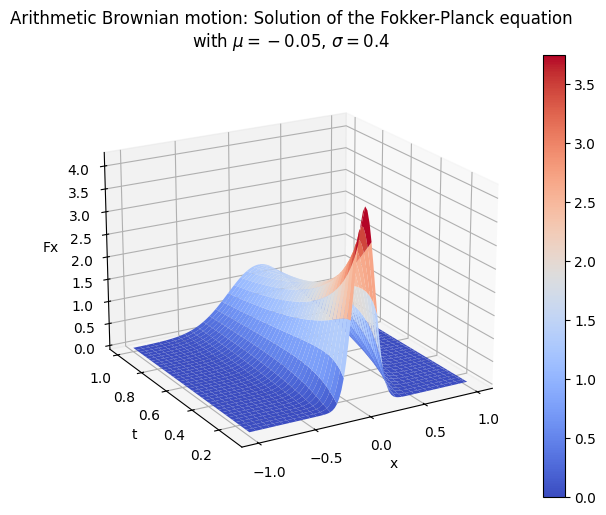

In [8]:
# Solution of the Fokker-Planck/drift−diffusion equation
from matplotlib import cm

plt.figure()
D = sigma**2 / 2  # diffusion coefficient
x, tt = np.meshgrid(np.arange(-1, 1.02, 0.02), np.arange(0.1, 1.02, 0.025))
f = 1 / (2 * np.sqrt(np.pi * D * tt)) * np.exp(-(x - mu * tt)**2 / (4 * D * tt))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x,tt,f, cmap=cm.coolwarm)
ax.set_xlabel('x') #abm values
ax.set_ylabel('t')
ax.set_zlabel('Fx') # density
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.view_init(elev=20, azim=-120)
plt.colorbar(surf)
plt.tight_layout()
plt.title('Arithmetic Brownian motion: Solution of the Fokker-Planck equation\nwith $\mu = -0.05$, $\sigma = 0.4$')